In [13]:
import pandas as pd

df = pd.read_csv('coffee-listings-from-all-walmart-stores.csv')

In [44]:
df['rating_level'] = pd.cut(df['rating'],[0,1,2,3,4,5], labels=['0-1','1-2','2-3','3-4','4-5'])

In [14]:
df.isnull().sum()

title                           0
coffee_type                   279
rating                          0
reviews                         0
seller_name                     0
thumbnail                       0
price                           0
weight                          0
weight_formatted_to_gramms      0
dtype: int64

In [15]:
#delete coffee_type
df.drop('thumbnail', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       1400 non-null   object 
 1   coffee_type                 1121 non-null   object 
 2   rating                      1400 non-null   float64
 3   reviews                     1400 non-null   int64  
 4   seller_name                 1400 non-null   object 
 5   price                       1400 non-null   float64
 6   weight                      1400 non-null   object 
 7   weight_formatted_to_gramms  1400 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 87.6+ KB


Text(0.5, 1.0, 'Correlation between variables')

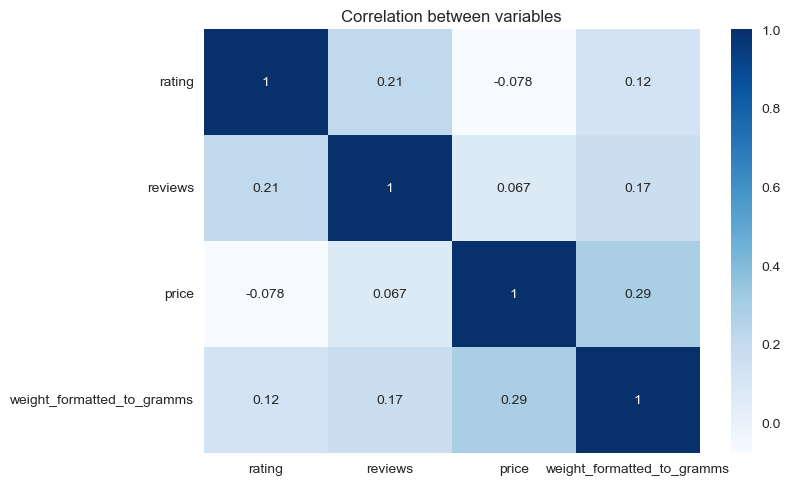

In [27]:
#I wanted to take a quick glance at correlation between numeric columns using DataFrame.corr():
#
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

ax = sns.heatmap(df.corr(), annot=True, cmap='Blues')
ax.set_title('Correlation between variables')

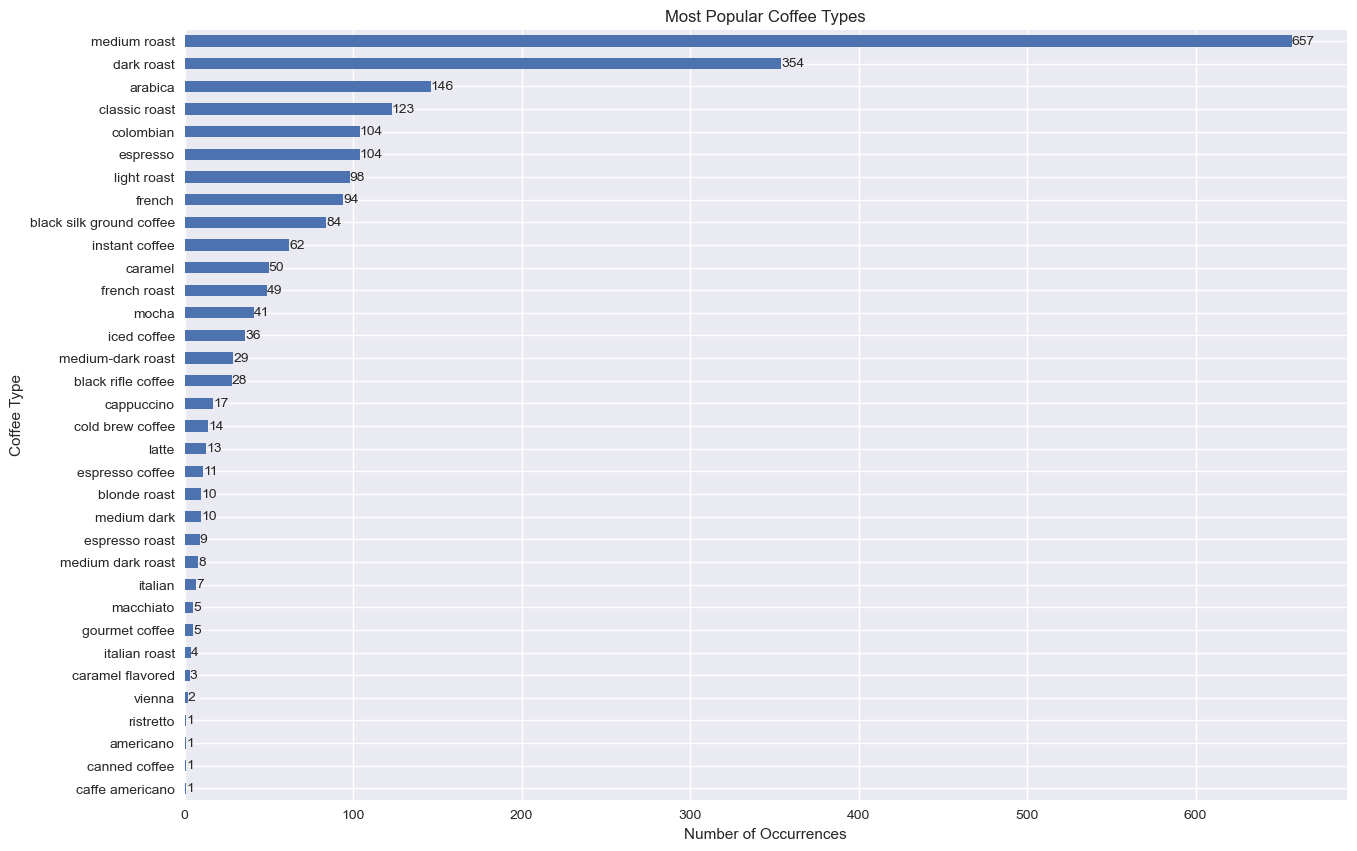

In [55]:
#most popular type: medium roast /Dark Roast /Arabica
coffee_types = df['coffee_type'].fillna(method='ffill')

coffee_types_2 = []

for coffee_type in coffee_types:
    coffee_types_2.extend(coffee_type.split(','))

plt.title('Most Popular Coffee Types')
coffee_types_new_series = pd.Series(coffee_types_2).dropna()
ax = coffee_types_new_series.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,10))
ax.bar_label(ax.containers[0]) # bar annotation

plt.ylabel('Coffee Type')
plt.xlabel('Number of Occurrences')

plt.show()


In [62]:
##most rating:  community coffee caf special decaf medium-dark roast coffee single-serve cups 36 ct box compatible with keurig 2.0 k-cup brewers / rating of 5 and 108 reviews
df.query('rating == rating.max()')[['title', 'rating', 'reviews']].sort_values(
    by='reviews', ascending=False
).head(10).style.hide(axis='index').background_gradient(cmap='Greens')

title,rating,reviews
community coffee caf special decaf medium-dark roast coffee single-serve cups 36 ct box compatible with keurig 2.0 k-cup brewers,5.000000,108
"cameron's coffee jamaican me crazy ground coffee, light roast, 12 oz",5.000000,29
"caf bustelo ground coffee, dark roast, 6-ounce brick",5.000000,20
"vispak zlatna bosnian coffee, 35.2 oz",5.000000,11
"black rifle ready-to-drink coffee, espresso with cream, 11oz, can",5.000000,8
eldorado espresso brick 9 oz,5.000000,7
"black rifle ready-to-drink coffee, espresso mocha, 11oz, can",5.000000,6
"death wish coffee, organic, fair trade, pumpkin chai ground coffee, 12 oz, bag",5.000000,4
"death wish coffee, organic, fair-trade, espresso roast ground, 14oz, bag",5.000000,4
"kauai coffee na pali coast k-cup coffee pods, dark roast, 24 ct",5.000000,4


In [36]:
#most reviews is :
df.query('reviews == reviews.max()')[['title', 'reviews']]

,title,reviews
46,"folgers classic roast ground coffee, medium ro...",15148


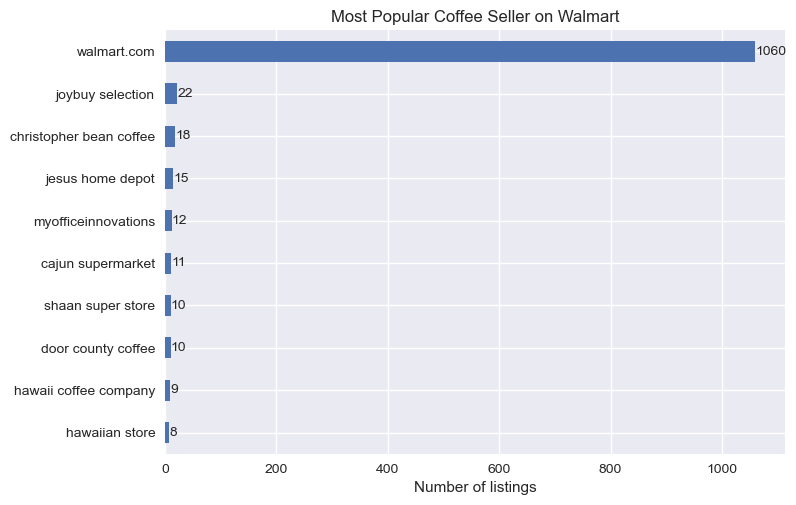

In [65]:
#most popular seller: Walmart
plt.title('Most Popular Coffee Seller on Walmart')

ax = df.seller_name.value_counts().head(10).sort_values().plot(kind='barh')
ax.bar_label(ax.containers[0])

plt.xlabel('Number of listings')
plt.show()

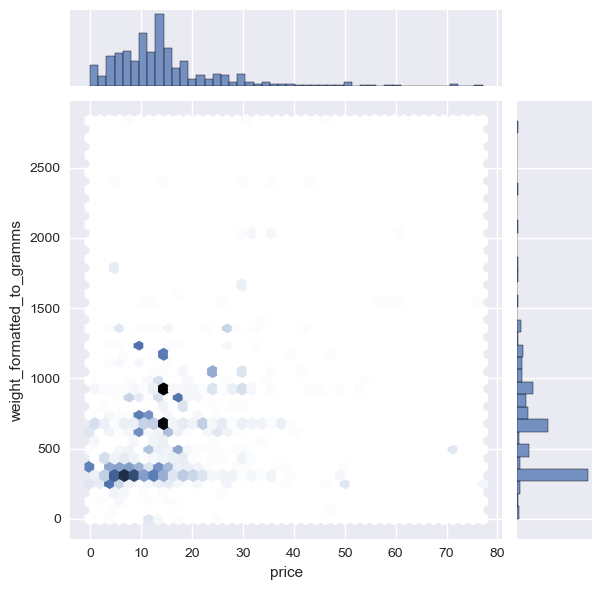

In [33]:
#Most frequent coffee weight: 300-500g
sns.jointplot(data=df, x='price', y='weight_formatted_to_gramms', kind='hex')

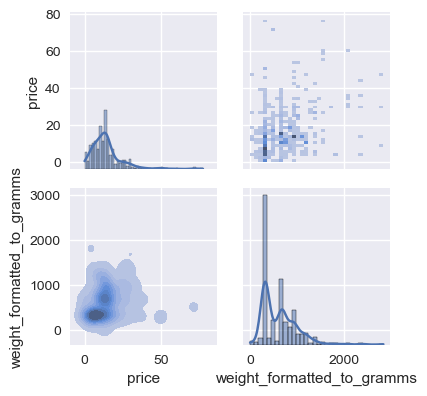

In [77]:
g = sns.PairGrid(df[['price', 'weight_formatted_to_gramms']], height=2)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)